In [16]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

In [18]:
# Calculate error variances
E = np.var(observations)
M = np.var(model_output)

In [19]:
# Calculate weights
W_O = M / (E + M)
W_M = E / (E + M)
print(f"Observation weight (W_O): {W_O}")
print(f"Model output weight (W_M): {W_M}")

Observation weight (W_O): 0.533139708072684
Model output weight (W_M): 0.46686029192731604


In [20]:
# Compute analysis fields
analysis = W_O * observations + W_M * model_output

print("Analysis fields:", analysis)

Analysis fields: [15.01325588 15.81988382 14.26656985 15.89337206 25.14005809]


In [21]:
# Calculate RMSE
def calculate_rmse(true_values, predictions):
    return np.sqrt(np.mean((true_values - predictions) ** 2))

# Calculate Bias
def calculate_bias(true_values, predictions):
    return np.mean(predictions - true_values)

In [22]:
# RMSE and Bias for the analysis fields
rmse_analysis_obs = calculate_rmse(observations, analysis)
bias_analysis_obs = calculate_bias(observations, analysis)

rmse_analysis_model = calculate_rmse(model_output, analysis)
bias_analysis_model = calculate_bias(model_output, analysis)

print(f"RMSE (Analysis vs Observations): {rmse_analysis_obs}")
print(f"Bias (Analysis vs Observations): {bias_analysis_obs}")

print(f"RMSE (Analysis vs Model Output): {rmse_analysis_model}")
print(f"Bias (Analysis vs Model Output): {bias_analysis_model}")

RMSE (Analysis vs Observations): 0.19807204697312247
Bias (Analysis vs Observations): -0.09337205838546332
RMSE (Analysis vs Model Output): 0.22619202173880623
Bias (Analysis vs Model Output): 0.10662794161453668


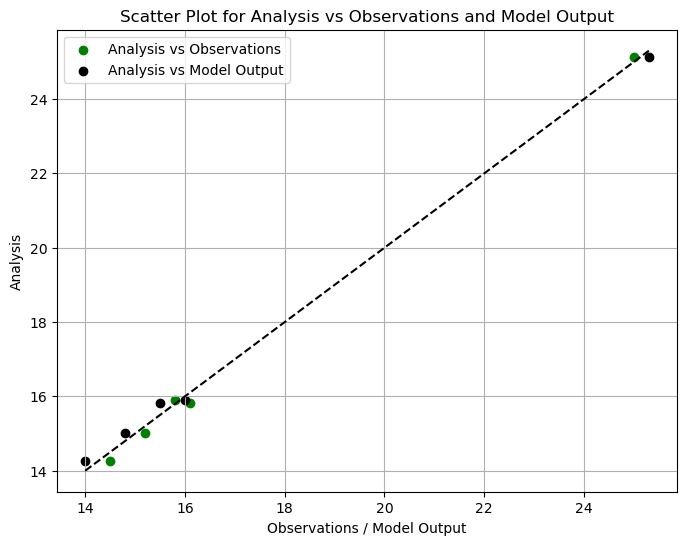

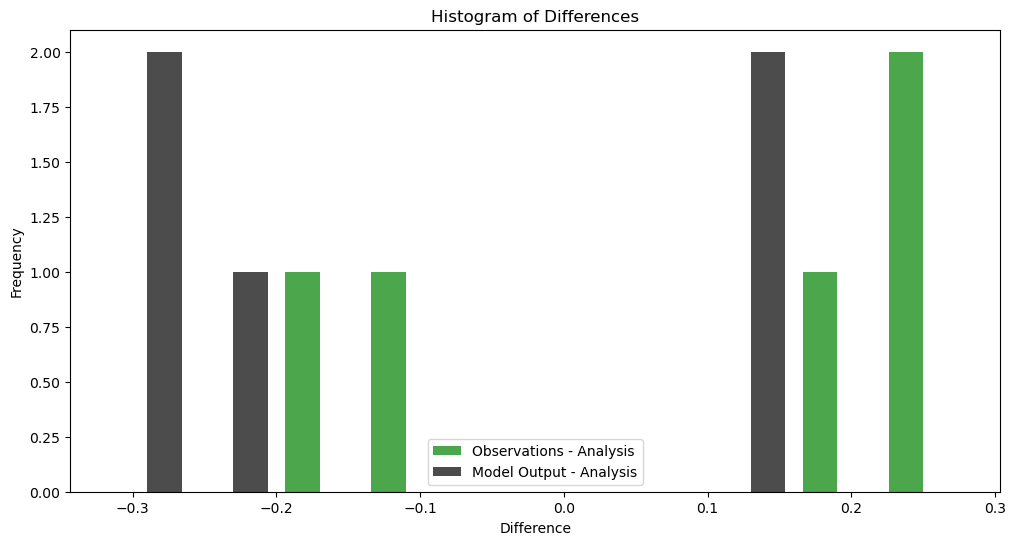

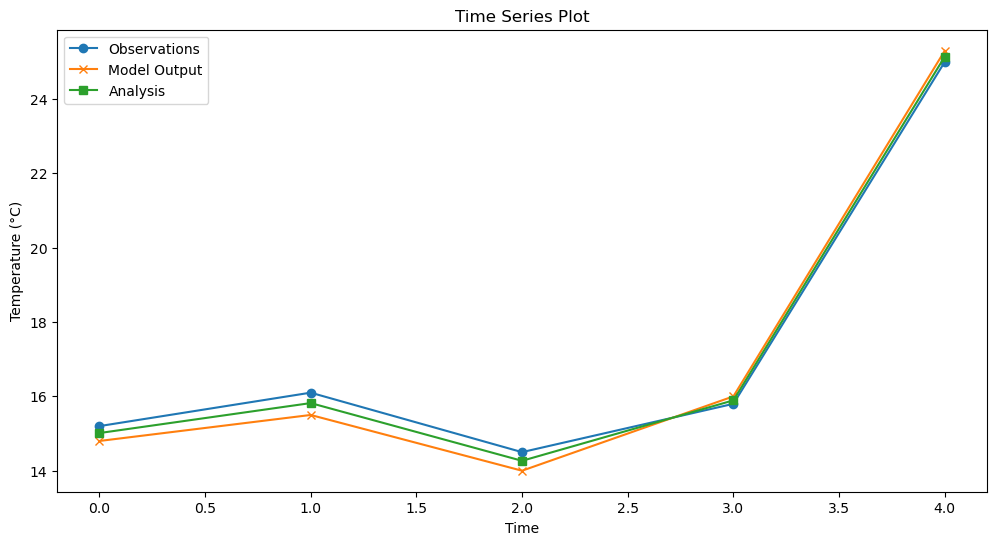

In [26]:
# Combined scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(observations, analysis, color='green', label='Analysis vs Observations')
plt.scatter(model_output, analysis, color='black', label='Analysis vs Model Output')
plt.plot([min(min(observations), min(model_output)), max(max(observations), max(model_output))], 
         [min(min(observations), min(model_output)), max(max(observations), max(model_output))], 'k--')
plt.xlabel('Observations / Model Output')
plt.ylabel('Analysis')
plt.legend()
plt.title('Scatter Plot for Analysis vs Observations and Model Output')
plt.grid(True)
plt.show()

# Histogram
colors = ['green', 'black']
plt.figure(figsize=(12, 6))
plt.hist([observations - analysis, model_output - analysis], label=['Observations - Analysis', 'Model Output - Analysis'], bins=10, alpha=0.7,  color=colors)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Differences')
plt.show()

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Observations', marker='o')
plt.plot(model_output, label='Model Output', marker='x')
plt.plot(analysis, label='Analysis', marker='s')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Time Series Plot')
plt.show()


In [10]:
print(pd.DataFrame(
    { "OBSERVATIONS(°C)": observations,
      "MODEL OUTPUT(°C)": model_output,
      "ANALYZED DATA(°C)": analysis,
      "RMSE": rmse_analysis_obs,
      "BIAS ERROR": bias_analysis_obs,
    }
))

   OBSERVATIONS(°C)  MODEL OUTPUT(°C)  ANALYZED DATA(°C)      RMSE  BIAS ERROR
0              15.2              14.8          15.013256  0.198072   -0.093372
1              16.1              15.5          15.819884  0.198072   -0.093372
2              14.5              14.0          14.266570  0.198072   -0.093372
3              15.8              16.0          15.893372  0.198072   -0.093372
4              25.0              25.3          25.140058  0.198072   -0.093372
